# Random Forest Classifier

## Importing necessary libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn import tree

## View the data
Most of the data is categorical

In [2]:
data = pd.read_csv("../Datasets/googleplaystore.csv")
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Information about the dataset
We can see that we have a lot of NaN's or missing values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Statistics of the data
There is only one numeric attribute. We will treat this as our target variable

In [4]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## Converting the target variable into integer type
So that we have a good 5 class target variable

In [5]:
data["Rating"] = np.round(data["Rating"])
data["Rating"]

0        4.0
1        4.0
2        5.0
3        4.0
4        4.0
        ... 
10836    4.0
10837    5.0
10838    NaN
10839    4.0
10840    4.0
Name: Rating, Length: 10841, dtype: float64

## Checking for NaN's in the data
isnull() gives a boolean series with True mapped to missing values. We take these values and OR them, essentially knowing if we have any missing values in our dataframe


In [6]:
data.isnull().values.any()

True

## Cleaning process
NaN's are not equal to NaN's since python3. This is a quick way of finding values that are NaN's in a particular attribute.
Here we are cleaning the target variable "Rating" tha we are trying to predict.
We are not goign to  impute any values because these are target variables and not data

In [7]:
data[data["Rating"]!=data["Rating"]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


## Getting dataframe indices of the NaqN values

In [8]:
nans = data[data["Rating"]!=data["Rating"]].index.tolist()
nans

[23,
 113,
 123,
 126,
 129,
 130,
 134,
 163,
 180,
 185,
 227,
 321,
 478,
 479,
 480,
 610,
 613,
 617,
 620,
 621,
 623,
 624,
 626,
 627,
 628,
 629,
 630,
 631,
 632,
 635,
 637,
 638,
 639,
 641,
 642,
 643,
 644,
 647,
 648,
 649,
 650,
 651,
 652,
 653,
 658,
 659,
 660,
 666,
 669,
 683,
 698,
 704,
 1013,
 1024,
 1025,
 1032,
 1033,
 1034,
 1039,
 1041,
 1043,
 1045,
 1046,
 1177,
 1180,
 1455,
 1469,
 1478,
 1484,
 1489,
 1517,
 1519,
 1520,
 1530,
 1534,
 1536,
 1537,
 1539,
 1540,
 1552,
 1557,
 1559,
 2111,
 2265,
 2280,
 2294,
 2356,
 2390,
 2419,
 2422,
 2423,
 2424,
 2425,
 2430,
 2431,
 2432,
 2433,
 2434,
 2435,
 2436,
 2437,
 2438,
 2439,
 2440,
 2441,
 2442,
 2443,
 2446,
 2447,
 2449,
 2451,
 2453,
 2456,
 2460,
 2461,
 2462,
 2465,
 2466,
 2467,
 2468,
 2469,
 2470,
 2471,
 2473,
 2474,
 2478,
 2479,
 2480,
 2481,
 2483,
 2485,
 2498,
 2501,
 2502,
 2503,
 2513,
 2516,
 2529,
 2540,
 3252,
 3258,
 3577,
 3579,
 3580,
 3583,
 3585,
 3589,
 3599,
 3603,
 3616,
 36

## Drop the indices of NaN values

In [9]:
data = data.drop(nans,axis = 0)

## Sanity Checking if cleaning worked
We can see it results in zero rows. SO cleaning was successful

In [10]:
data[data["Rating"]!=data["Rating"]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## We still have some missing values

In [11]:
data.isnull().values.any()

True

## Checking where the missing values are
We can observe the missing values are coming from $["Content Rating","Current Ver","Android Ver"]$

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   object 
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9363 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


## Cleaning the data
We use a forloop to speed up the process. Much simpler to understand

In [13]:
data_clean = data.copy()
for col in ["Content Rating","Current Ver","Android Ver"]:
    data_clean = data_clean.drop(data_clean[data_clean[col]!=data_clean[col]].index.tolist(),axis = 0)

## Viewing the data

In [14]:
data_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.0,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,4.0,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5.0,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.0,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.0,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.0,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.0,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Checking for Missing values.
We have no missing values

In [15]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


## Sanity Checking

In [16]:
data_clean.isnull().values.any()

False

## Helper Functions to clean columns "Size" and "Installs"
Removing the "M" tokens in the size and making sure the kb values are represented as MB. Any other values are converted to zero

In [17]:
def temp(x):
    if "M" in x:
        return(x[:-1])
    elif "k" in x:
        return(float(x[:-1])/1000)
    else:
        return 0
data_clean["Size"] = data_clean["Size"].apply(temp)

Installs has "+" at the end, we remove that.

In [18]:
def inst(x):
    if "+" in x:
        return(x[:-1])
data_clean["Installs"] = data_clean["Installs"].apply(inst)

## Viewing the data

In [19]:
data_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.0,159,19,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,4.0,967,14,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5.0,87510,8.7,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.0,215644,25,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.0,967,2.8,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.0,38,53,"5,000",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.0,114,0,"1,000",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Mapping categorical data to numeric types
This is actually a very unnecessary step in generalk. RandomForest implementation actually is capable of handling categorical data because there is no calculation that involves using he original data. In case of numeric, average is used for calculating the impurity (More on that later), and in case of categoric, probabilities are uses for gini score.<br>
Unfortunately Sci-kit learns implementation does not handle categorical data. We could turn everything into OneHotRepresentation but that would result in large number of columns for the trees and would hurt performance.<br>
The R implementation of RandomForest handles categorical data as does the XGBoost framework.<br>
Converting them into numeric representation is, in general, is considered bad practice as the algorthm considers these numbers in order and establishes a hierarchy in the data that does not even exist. This can result in weird results.

In [20]:
for i in ["Category","Type","Content Rating","Genres","Last Updated","Android Ver","Current Ver"]:
    vals = data_clean[i].unique()
    vic_status = {vals[j]:j for j in range(len(vals))}
    data_clean[i] = data_clean[i].map(vic_status)
    data.head()

## Abandoned OneHot Representation

In [21]:
#ohe = OneHotEncoder()
#for i in ["Category","Type","Content Rating","Genres","Last Updated","Android Ver","Current Ver"]:
#    data_clean[i] = data_clean[i].astype("object")
#    data_clean[i] = ohe.fit_transform(data_clean[i].values.reshape(-1,1)).toarray().tolist()

## Viewing the data

In [22]:
data_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.0,159,19,"10,000",0,0,0,0,0,0,0
1,Coloring book moana,0,4.0,967,14,"500,000",0,0,0,1,1,1,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,5.0,87510,8.7,"5,000,000",0,0,0,0,2,2,0
3,Sketch - Draw & Paint,0,4.0,215644,25,"50,000,000",0,0,1,0,3,3,1
4,Pixel Draw - Number Art Coloring Book,0,4.0,967,2.8,"100,000",0,0,0,2,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,18,4.0,7,2.6,500,0,0,0,12,304,0,5
10836,Sya9a Maroc - FR,18,4.0,38,53,"5,000",0,0,0,12,472,1864,5
10837,Fr. Mike Schmitz Audio Teachings,18,5.0,4,3.6,100,0,0,0,12,122,5,5
10839,The SCP Foundation DB fr nn5n,3,4.0,114,0,"1,000",0,0,3,5,892,3,8


## Seperating into target and data variables

In [23]:
data_Y = data_clean["Rating"]
data_X = data_clean[[i for i in data.columns if i not in ["Rating","App"]]]

## Converting the installs into integer values
There are some commas in the attribute that neads to be removed and converted to integer type

In [24]:
def con_int(x):
    return int(x.replace(',',''))
data_X["Installs"] = data_X["Installs"].apply(con_int)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Converting the price
The price has the dollar symbol that needs to be removed and this is converted to float type

In [25]:
data_X["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [26]:
def con_price(x):
    return float(x.replace('$',''))
data_X["Price"] = data_X["Price"].apply(con_price)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Splitting into train-test-split

In [27]:
train_data,test_data,train_labels,test_labels = train_test_split(data_X,data_Y,test_size  = 0.2)
print(train_data.shape,train_labels.shape)
print(test_data.shape,test_labels.shape)

(7488, 11) (7488,)
(1872, 11) (1872,)


## Random Forest Classifier
Random Forest classifier uses decision trees to classify. Decision trees are not good at generalizing the predictions andhence random forest aims to do just that. Random forests have many trees that classify (Or predict/regress) the input, and a majority vote is taken to decide the final output. Unlike decision trees, the attributes is initally selected randomly and then the impurity score is considered to select which one seperates the data the best. Rnadom forests typically use bootstrapping to make the decision trees. All of these help in beter generalizing. The original implementations handles categorical data and uses guesses initally and improves this guess using the decision trees.<br><br>
The RFC function in sklearn has some defaults:<br>
1.Number of trees is 100<br>
2.Number of attributes selected is square root of number of features (For each tree at every step)<br>
3.The impurity function by defualt is gini<br>
4.By defualt there is no limit on the number of leaf nodes<br>
5.The algorithm boostraps (Without replacement,unlike the original implementation) by default

In [30]:
train_scores = list()
test_scores = list()
for tree in [100,150,200]:
    temp1 = list()
    temp2  = list()
    for feats in [None,"sqrt","log2"]:
        model_forest = RFC(n_estimators = tree,max_features = feats)
        model_forest.fit(train_data,train_labels)
        temp1.append(model_forest.score(train_data,train_labels)*100)
        temp2.append(model_forest.score(test_data,test_labels)*100)
    train_scores.append(temp1)
    test_scores.append(temp2)

In [39]:
train = pd.DataFrame(train_scores,columns = ["None","Sqrt","Log2"] )
train

,None,Sqrt,Log2
0,100.0,100.0,100.0
1,100.0,100.0,100.0
2,100.0,100.0,100.0


In [40]:
test = pd.DataFrame(test_scores,columns = ["None","Sqrt","Log2"])
test

,None,Sqrt,Log2
0,75.106838,76.014957,75.694444
1,75.320513,76.442308,76.068376
2,75.641026,75.908120,76.175214


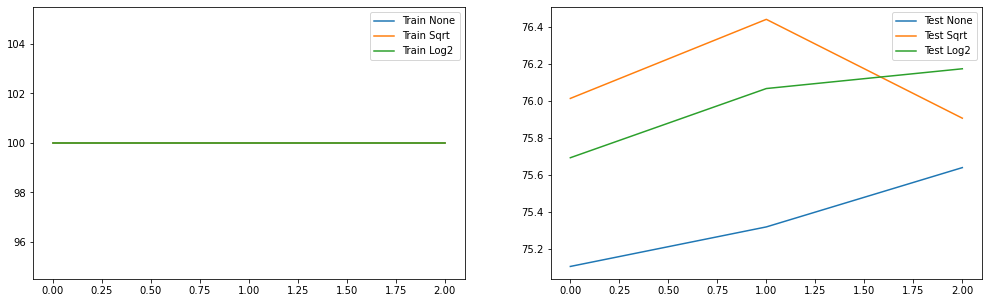

In [55]:
fig,ax = plt.subplots(1,2,figsize = (17,5))
for col in train.columns:
    ax[0].plot(train.index,train[col],label = "Train "+col)
    ax[0].legend()
for col in test.columns:
    ax[1].plot(test.index,test[col],label = "Test "+col)
    ax[1].legend()

    
    

## Accuracy Score of the Classifier

In [35]:
model_forest = RFC(n_estimators = 150,max_features = "sqrt")
model_forest.fit(train_data,train_labels)

RandomForestClassifier(max_features='sqrt', n_estimators=150)

In [36]:
print("Train accuracy: ",model_forest.score(train_data,train_labels)*100)
print("Test accuracy: ",model_forest.score(test_data,test_labels)*100)

Train accuracy:  100.0
Test accuracy:  76.22863247863248


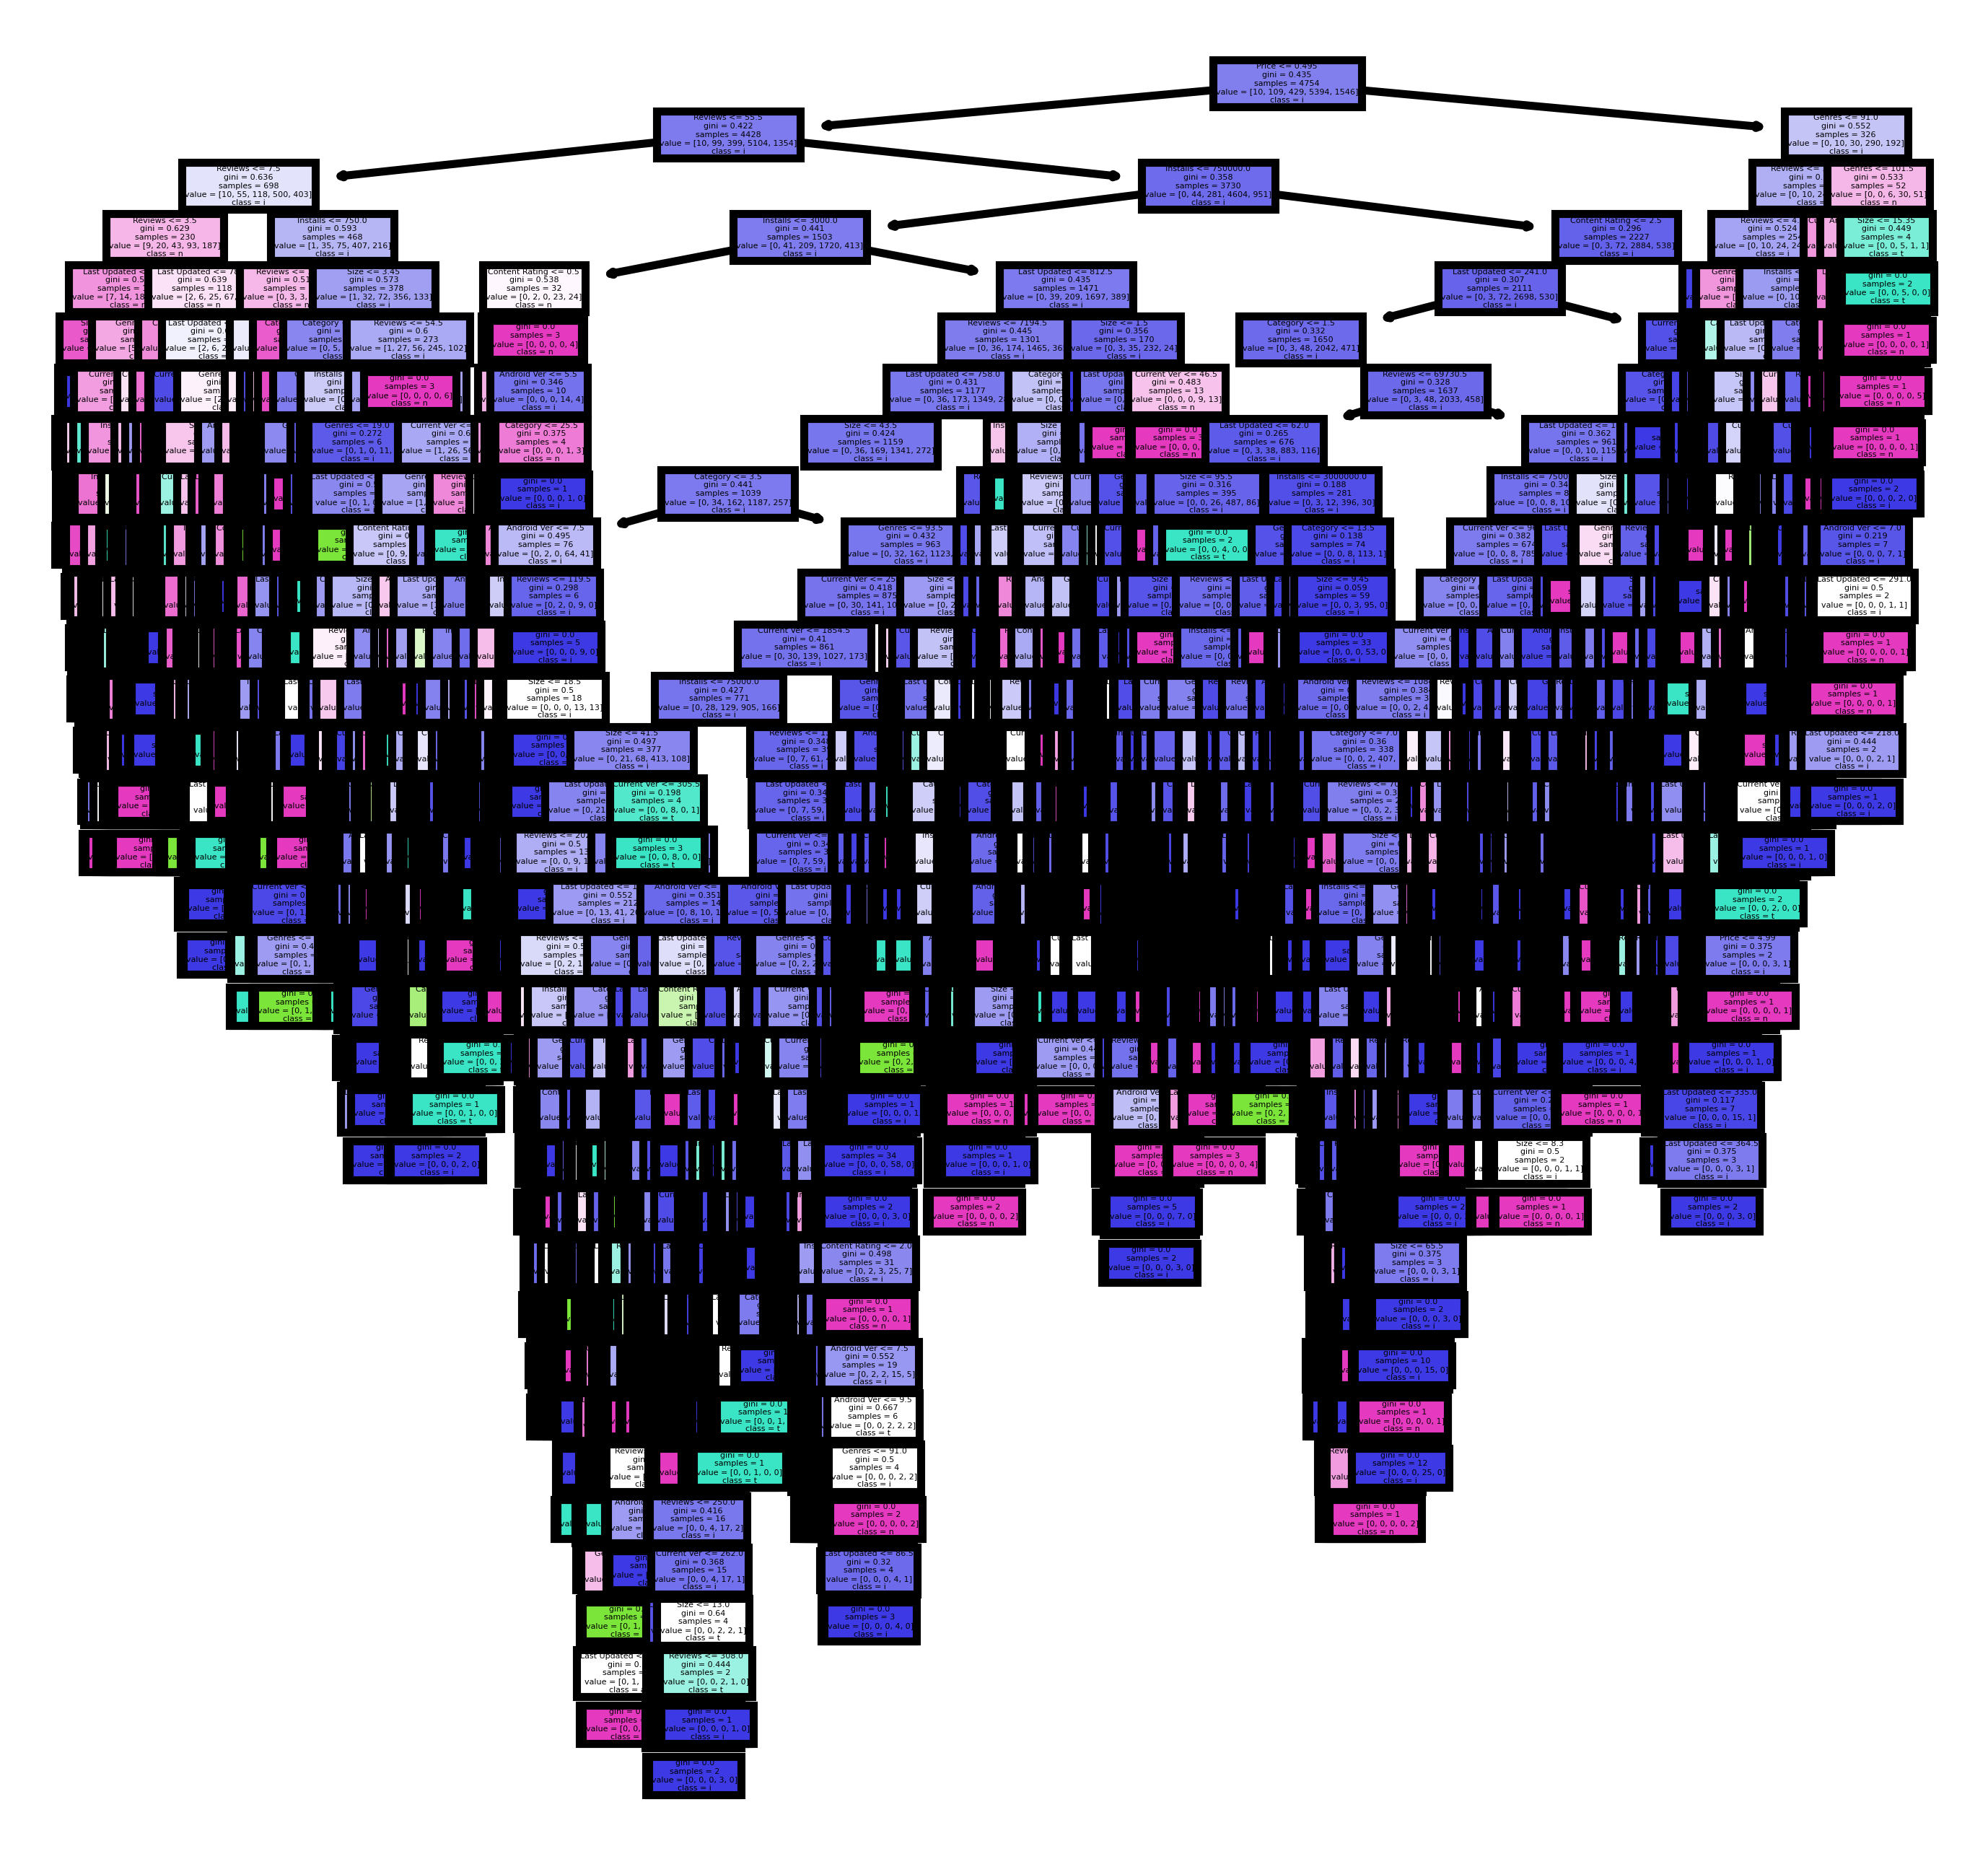

In [60]:
fn=data_X.columns
cn="Rating"
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model_forest.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

## Decision Path of the sample 0

In [37]:
model_forest.decision_path(train_data.loc[0].values.reshape(1,-1))[0].toarray()

array([[1, 1, 0, ..., 0, 0, 0]], dtype=int64)

## Gini impurity scores of the dataset we have used

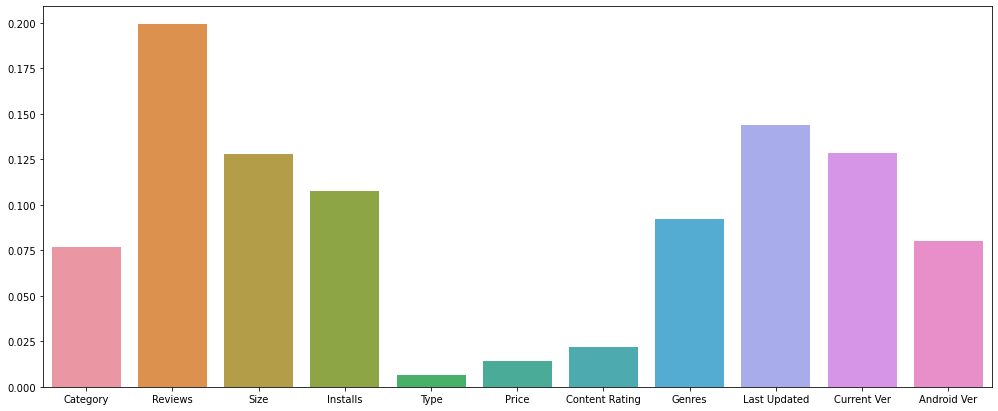

In [38]:
plt.figure(figsize = (17,7))
sns.barplot(x = train_data.columns,y = model_forest.feature_importances_)

<center><h1>End of notebook</h1><center>